##  The Poisson Distribution

In [2]:
from __future__ import division, print_function
import seaborn as sns

from IPython.display import Math
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt

%matplotlib inline

###  How many pieces of mail do you receive daily?

Let's say you usually get 10 letters a day.. 

We can use the Poisson Equation to look at the Probability Mass Function

$ P(X=x)  = (\lambda^xe^{-\lambda})/x$!

In [3]:
sum=0
pois=[]
def our_poisson(x,lam):
    p=(lam**x)*np.exp(-lam)/(math.factorial(x))
    return p

for x in range(50):
    pois.append(our_poisson(x,10))

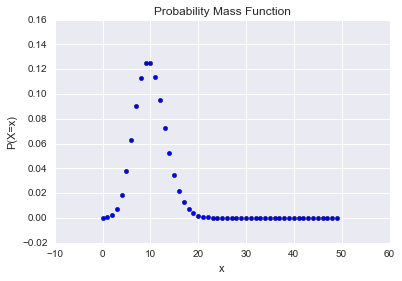

In [4]:
plt.scatter(range(50),pois)
plt.title("Probability Mass Function")
plt.ylabel("P(X=x)")
plt.xlabel("x")

#### The poisson distribution applies when:   
    - Events are something that can be counted in whole numbers   
    - Occurences are independent
    - Average rate of occurence for the time period in question is known.   
    - It is possible to count how many events have occurred
    - Both the mean and the variance of the distribution are equal to lambda
    
#### More examples:   
    # of births per hour in a hospital   
    # of cars passing by Madison Ave in some time interval  
    # of goals in a hockey game
    # Soldiers in the Prussian calvary killed by horse kicks
    
#### (However...)
    

## Poisson Distribution:

$P(X=x)  = (\lambda^xe^{-\lambda})/x!$  
$E(X)=\lambda$   
$Var(X)=\lambda$  


In [5]:
sample=np.random.poisson(10, 1000)
print (sample.mean())
print (sample.var())

10.193
9.963751


In [6]:
# A REAL Example: 'Turn Around Time' for a Nose Landing Gear Tire (Delivery) was 10 days
# The rates for tire fails for each station were as follows:

dets=[['JFK',16],['FLL',7],['EWR',5],['LGB',4],['MCO',4]]
data=pd.DataFrame(dets,columns=['STA','Lambda'])
data.head()

,STA,Lambda
0,JFK,16
1,FLL,7
2,EWR,5
3,LGB,4
4,MCO,4


In [7]:
# 
sum_=0
for i in range(len(data)):
    sum_=0
    for j in range(40):
        sum_+=our_poisson(j,int(data.Lambda[i]))
        if sum_ > 0.985:
            print(data.STA[i])
            print(j)
            print(sum_)
            print('\n')
            break

JFK
25
0.986881437112


FLL
13
0.987188607197


EWR
10
0.986304731402


LGB
9
0.991867757203


MCO
9
0.991867757203




### Poisson Regression Example

We can use Regression to predict count data 
    * We have some constraints
    * We'll need a  link function

In [8]:
import statsmodels.api as smf
from patsy import dmatrices

In [9]:
url='http://quantedu.com/wp-content/uploads/2014/05/job.txt'
data=pd.read_csv(url,delimiter=r"\s+")

In [10]:
Y,X = dmatrices('Job ~ Income + GPA', data=data, return_type='dataframe')
X.head()

,Intercept,Income,GPA
0,1.0,39.693,2.53
1,1.0,45.250,1.99
2,1.0,45.688,3.83
3,1.0,46.927,1.99
4,1.0,47.436,3.21


In [11]:
# Data 
pois_m=smf.GLM(Y[:150],X[:150], family=smf.families.Poisson(smf.families.links.log))
# Fitting our model using Maximum likelihood
pois_results=pois_m.fit()

print (pois_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    Job   No. Observations:                  150
Model:                            GLM   Df Residuals:                      147
Model Family:                 Poisson   Df Model:                            2
Link Function:                    log   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -162.49
Date:                Fri, 06 Jan 2017   Deviance:                       159.73
Time:                        10:26:30   Pearson chi2:                     167.
No. Iterations:                     8                                         
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -5.5933      0.708     -7.898      0.000        -6.981    -4.205
Income         0.0747      0.009      8.728      0.0

### Goodness of Fit Measurement for GLM  ~ Pearson's Chi Squared Statistic

We'd like to test the claim that the tire fails at JFK are actually a poisson distribution: 


The chi-squared test is used to determine whether there is a significant difference between the expected frequencies and the observed frequencies in one or more categories.

Sample data:

Number of Tire Failures at JFK
Study was conducted for 100 (1 day intervals) 



Tires Failures | 0| 1 | 2 | 3 | > 4
--------|----------
 |12 | 25 | 35 | 16 | 12
 

Test the claim that this distribution is a poisson. 

Ho:  X ~ is poisson distribution (w/ lambda=2) 
H1:  X  is not a poisson distribution (w/ lambda=2) 



$ \chi^2  =\sum_{} (O_i-E_i)^2/E_i$

$E_i=N*p$

In [12]:
E_0= our_poisson(0,2)*100
print('E_0=',E_0)
E_1= our_poisson(1,2)*100
print('E_1=',E_1)
E_2= our_poisson(2,2)*100
print('E_2=',E_2)
E_3= our_poisson(3,2)*100
print('E_3=', E_3)
E_gr_4= 100- (E_0 + E_1 + E_2 + E_3)
print('E_gr_4=',E_gr_4)
print('\n')

Chi_Sq= (12.0-E_0)**2/E_0 + (25.0-E_1)**2/E_1+(35.0-E_2)**2/E_2+ (16.0-E_3)**2/E_3+ (12.0-E_gr_4)**2/E_gr_4
print('Chi_Sq= ',Chi_Sq)


E_0= 13.5335283237
E_1= 27.0670566473
E_2= 27.0670566473
E_3= 18.0447044315
E_gr_4= 14.2876539501


Chi_Sq=  3.2546289661


According to our Look-up Table: Rejection Region is to the right of 9.48   
(for df =5 and 0.05 significance level)   

Therefore, we can accept our Null Hypothesis

### One more thing, Deviance: 

Deviance for Poisson:  ( where mu is the predicted value) 
    
$D_p  = 2\sum_{1}^{n}(y_ilog(y_i/\mu_i)-(y_i-\mu_i))$

Deviance of Normal


$D_n  =\sum_{1}^{n}(y_i\mu_i)^2$

Deviance of Binomial:   
$D_b  = 2\sum_{1}^{n}(y_ilog(y_i/\mu_i)+(1-y_i)log[(1-y_i)/(1-\mu_i)])))$